In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [11]:
df = pd.read_json(r'Project\art_crawl\article\article\spiders\author_use.json')
df.columns

Index(['title', 'abstract', 'author', 'ins', 'author_num', 'date', 'keywords',
       'fund', 'participation', 'Unnamed: 0', 'province', 'city'],
      dtype='object')

Text(0, 0.5, '数量：篇')

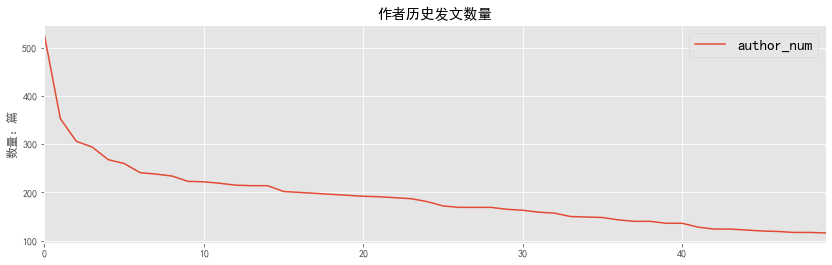

In [38]:
author_top50 = df[['author','author_num']].sort_values(by='author_num',ascending=False).head(50).reset_index()['author_num']
author_top50.plot(kind='line',figsize=(14,4))
plt.title(u'作者历史发文数量')
plt.legend(fontsize=15)
plt.ylabel(u'数量：篇')

In [35]:
len(df.title.unique())

503

In [36]:
len(df.author.unique())

833

In [95]:
#新增一列data，当title中包含“数据”时，其值等于df.author
df.loc[df['title'].str.contains('数据'),'data'] = df.author

In [88]:
df.drop(['haha','wahaha','Unnamed: 0'],axis=1,inplace=True)

In [93]:
#分组后统计某指定列
df.groupby(by='participation')['author'].count()

participation
0.12      8
0.14      7
0.17     12
0.20     15
0.25     92
0.33    195
0.50    244
1.00    286
Name: author, dtype: int64

In [98]:
#只显示data列非空行
df.data.dropna().head()

91      于翔
92     韩昊英
144    钮心毅
145    宋小冬
162    段征宇
Name: data, dtype: object

In [137]:
def authors(x):
    lst = []
    for i in df[df.title == x].author:     
        lst.append(i)
    return lst

In [138]:
df['authors'] = df.title.apply(authors)

2

In [139]:
df

,title,abstract,author,ins,author_num,date,keywords,fund,participation,province,city,data,authors
0,新型城镇化的关键改革与突破口选择,新型城镇化的实施需要一个统筹城乡的系统性改革框架。目前已经出台的改革方案和政策仍然存在较为严...,王瑞民,中国人民大学,14,2015年01期,"[新型城镇化, 户籍制度, 城中村土地制度改革, 工业用地重整, 农地整理]",[],0.50,北京,北京,NaN,"[王瑞民, 陶然]"
1,新型城镇化的关键改革与突破口选择,新型城镇化的实施需要一个统筹城乡的系统性改革框架。目前已经出台的改革方案和政策仍然存在较为严...,陶然,中国人民大学,81,2015年01期,"[新型城镇化, 户籍制度, 城中村土地制度改革, 工业用地重整, 农地整理]",[],0.50,北京,北京,NaN,"[王瑞民, 陶然]"
2,规划教育——从学位教育到职业发展,"<正>非常欢迎大家参加这个关于教育和人才的论坛。参加组织这个讨论的有四家机构的代表,城市规划...",叶裕民,中国人民大学,120,2015年01期,[],[],1.00,北京,北京,NaN,[叶裕民]
3,我国乡村治理的本原模式研究——以巴林左旗后兴隆地村为例,"乡村治理多方参与主体包括政府、企业、规划师和农民,在乡村治理公共政策制定实施过程中,我国普遍...",郐艳丽,中国人民大学,49,2015年06期,"[乡村治理, 本原模式, 农民置上, 农民置下]",[],1.00,北京,北京,NaN,[郐艳丽]
4,城市群空间集聚和扩散的特征与机制——以长三角城市群、武汉城市群和成渝城市群为例,"城市群在国家和地区发展中具有重要的经济社会地位,也是区域空间格局演变的重要形式。本文以分别位...",刘涛,中国人民大学,48,2016年02期,"[城市群, 集聚, 扩散, 驱动机制]",[国家自然科学基金项目(41371166)阶段性成果],0.33,北京,北京,NaN,"[刘涛, 曹广忠, 李凯]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,基于雨水廊道的丘陵城镇多尺度海绵系统构建,"大规模开发建设活动使城镇下垫面硬化程度加剧,""三通一平""阻断了雨水径流自然""源-汇""过程,对...",尹怡诚,湖南大学设计研究院有限公司,4,2019年08期,"[海绵系统, 雨水廊道, 丘陵地区, 多尺度, 多规合一]",[湖南省重点研发计划项目(2019SK2101、2018NK2053、2017SK2220)],0.25,湖南,长沙,NaN,"[韩静燕, 戴妍娇, 周敏, 尹怡诚]"
855,基于主体功能空间引导的城市增长形态模拟,"元胞自动机(CA)被广泛应用于城市空间形态演变模拟,但现有CA大多根据历史变化过程挖掘模拟规...",念沛豪,中国电子信息产业发展研究院,8,2019年09期,"[元胞自动机, 主体功能区, 城镇化, 城市规划, 土地利用规划]",[国家自然科学基金项目(41901311)资助],0.33,北京,北京,NaN,"[艾彬, 马世发, 念沛豪]"
856,城市控制性详细规划的碳排放评估,"梳理控制性详细规划与碳排放作用关系,构建了控规碳排放评估模型,并应用广州市典型控规进行案例分...",梁颢严,广东财经大学,2,2019年09期,"[控制性详细规划, 碳排放, 评估模型]",[国家自然科学基金项目(41501184)资助],0.20,广东,广州,NaN,"[李晓晖, 肖荣波, 郭洪旭, 周健, 梁颢严]"
857,37℃：让城市更有“温度”——我国母乳哺育设施规划理论框架与实践研究,"母乳哺育设施建设是体现我国城市文明和人性关爱的重要内容之一。在全面开放二孩政策背景下,公共场...",朱凯,启迪设计集团股份有限公司,1,2019年11期,"[母乳哺育设施, 公共场所, 附属型公共服务设施, 规划编制, 苏州市]","[国家自然科学基金项目(51578351), 江苏高校哲学社会科学研究重点项目(2018SJ...",0.50,江苏,苏州,NaN,"[徐家明, 朱凯]"


3    郐艳丽
Name: author, dtype: object